### Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from time import perf_counter

### Get Data

In [2]:
def line(x,a,b):
    return ((a*x) + b)

def get_data(path):
    paths_list = []
    only_filename_list = []
    for root, subdirs, files in os.walk(path):
        for file in files:
            if file[-4:] == '.csv':
                paths_list.append(os.path.join(root, file))
                only_filename_list.append(file)
    return paths_list, only_filename_list

class Data_csv:
    def __init__(self, name, data, filename, coef, intercept):
        self.name = name
        self.data = data
        self.filename = filename
        self.coef = coef
        self.intercept = intercept

paths_list, filenames_list = get_data('Data')
class_data_list = []

i = 0
for i in range(len(paths_list)):
    class_data_list.append(Data_csv(paths_list[i], pd.read_csv(paths_list[i]), filenames_list[i],None, None))
    #class_data_list[i].data.drop(columns = ['Unnamed: 0'], inplace = True)
    if class_data_list[i].filename.index('C') == 1:
        class_data_list[i].data['Current'] = int(filenames_list[i][0])
    else:
        class_data_list[i].data['Current'] = int(filenames_list[i][0:2]) 
    


### Prepare Data

In [3]:
full_data = pd.DataFrame()
X = pd.DataFrame()
y = pd.DataFrame()

i = 0
for i in range(len(class_data_list)):

    full_data = pd.concat([full_data, class_data_list[i].data], ignore_index=True)

X = full_data.drop(columns=['Current'])
y = full_data['Current']

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

### Train the Model

In [10]:
clf = DecisionTreeClassifier(random_state=42)
t0 = perf_counter()
clf.fit(X_test, y_test)
time = perf_counter()-t0


### Metrics

In [11]:
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
print("mse : ",mean_squared_error(y_test, y_pred))
print("R2 Score: ",r2_score(y_test, y_pred))
print("Time Consumed: ",time)

1.0
mse :  0.0
R2 Score:  1.0
Time Consumed:  0.025448600001254817


### Visualize The Tree

[Text(0.8022669589125769, 0.9833333333333333, 'X[2] <= 3.141\ngini = 0.833\nsamples = 4709\nvalue = [828, 839, 755, 805, 751, 731]'),
 Text(0.6851459723129315, 0.95, 'X[1] <= 22.249\ngini = 0.817\nsamples = 3672\nvalue = [263, 432, 721, 777, 748, 731]'),
 Text(0.5374873168968091, 0.9166666666666666, 'X[2] <= 3.055\ngini = 0.806\nsamples = 3517\nvalue = [120, 432, 721, 765, 748, 731]'),
 Text(0.2921793361634633, 0.8833333333333333, 'X[1] <= 13.345\ngini = 0.795\nsamples = 2972\nvalue = [96, 313, 424, 703, 723, 713]'),
 Text(0.08098525844373951, 0.85, 'X[2] <= 2.921\ngini = 0.675\nsamples = 1139\nvalue = [0, 0, 20, 326, 373, 420]'),
 Text(0.023885053181563726, 0.8166666666666667, 'X[2] <= 2.735\ngini = 0.455\nsamples = 534\nvalue = [0, 0, 0, 1, 185, 348]'),
 Text(0.017913789886172794, 0.7833333333333333, 'gini = 0.0\nsamples = 185\nvalue = [0, 0, 0, 0, 0, 185]'),
 Text(0.029856316476954657, 0.7833333333333333, 'X[1] <= 7.259\ngini = 0.501\nsamples = 349\nvalue = [0, 0, 0, 1, 185, 163]'),

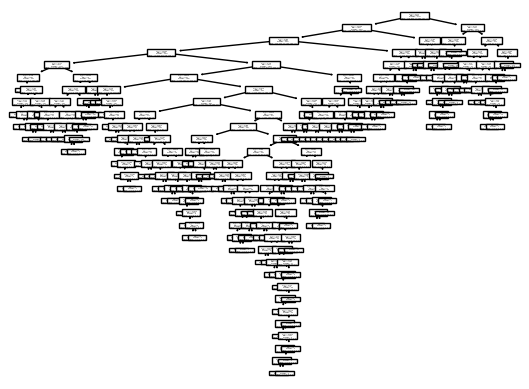

In [12]:
tree.plot_tree(clf)